In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

In [2]:
import spatial_tda as tda

In [3]:
grid_size = 6
r_seed = 42

In [4]:
gdf_none = generate_grid_dataframe(grid_size, autocorrelation="none", random_seed=r_seed)        # No spatial correlation
gdf_positive = generate_grid_dataframe(grid_size, autocorrelation="positive", random_seed=r_seed)  # Positive spatial correlation

In [5]:
gdf_none.head(2)

,Index,Value,geometry
0,0,14,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
1,1,15,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))"


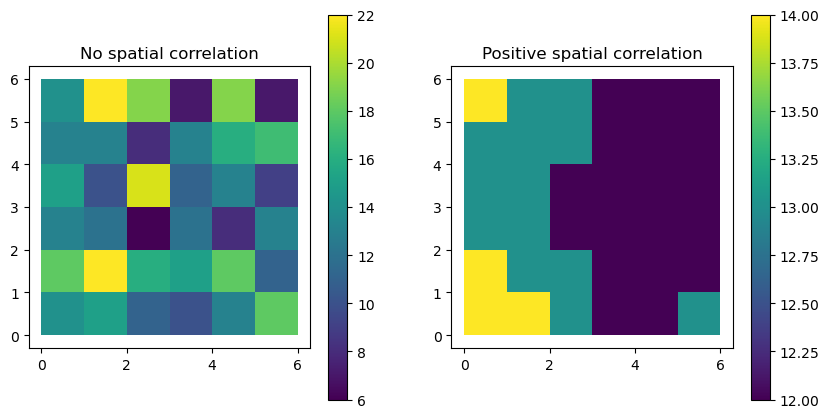

In [6]:
# plot value column
fig, ax = plt.subplots(1,2, figsize=(10,5))
gdf_none.plot(column='Value', ax=ax[0], legend=True)
gdf_positive.plot(column='Value', ax=ax[1], legend=True)
ax[0].set_title('No spatial correlation')
ax[1].set_title('Positive spatial correlation')
plt.show()

In [9]:
adjacency_simplex = tda.AdjacencySimplex(geo_dataframe=gdf_positive, variable = "Value", threshold=None, filter_method='down')

adjacency_simplex.filter_sort_gdf()

adjacency_simplex.calculate_adjacent_countries()

adjacency_simplex.form_simplicial_complex()


In [10]:
adjacency_simplex.plot_simplicial_complex()


GIF created and saved as adj_simplex_Value_down.gif.
